In [1]:
# Importing Required Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading Data Set

data = pd.read_csv(r"C:\Users\chand\Downloads\data_car.csv")

In [3]:
# Printing first 5 rows of the dataset

data.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


# 

# Exploratory Data Analysis

In [4]:
# Cheacking the columns names.count and data types
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [5]:
# Shape of the data 
data.shape

(11914, 16)

In [6]:
# Basic statistics such as mean,standard deviation,count,quantiles ,maximum and minimum value of numerical values

data.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [7]:
# Checking the number of Duplicate values in the data set

data.duplicated().sum()

715

In [8]:
# Printing the number of unique values in each columns

data.nunique()

Make                   48
Model                 915
Year                   28
Engine Fuel Type       10
Engine HP             356
Engine Cylinders        9
Transmission Type       5
Driven_Wheels           4
Number of Doors         3
Market Category        71
Vehicle Size            3
Vehicle Style          16
highway MPG            59
city mpg               69
Popularity             48
MSRP                 6049
dtype: int64

In [9]:
# Finding the Missing Values

data.isna().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [10]:
# Printing counts of type of 'make' in the data set

data.Make.value_counts()

Chevrolet        1123
Ford              881
Volkswagen        809
Toyota            746
Dodge             626
Nissan            558
GMC               515
Honda             449
Mazda             423
Cadillac          397
Mercedes-Benz     353
Suzuki            351
BMW               334
Infiniti          330
Audi              328
Hyundai           303
Volvo             281
Subaru            256
Acura             252
Kia               231
Mitsubishi        213
Lexus             202
Buick             196
Chrysler          187
Pontiac           186
Lincoln           164
Oldsmobile        150
Land Rover        143
Porsche           136
Saab              111
Aston Martin       93
Plymouth           82
Bentley            74
Ferrari            69
FIAT               62
Scion              60
Maserati           58
Lamborghini        52
Rolls-Royce        31
Lotus              29
Tesla              18
HUMMER             17
Maybach            16
Alfa Romeo          5
McLaren             5
Spyker    

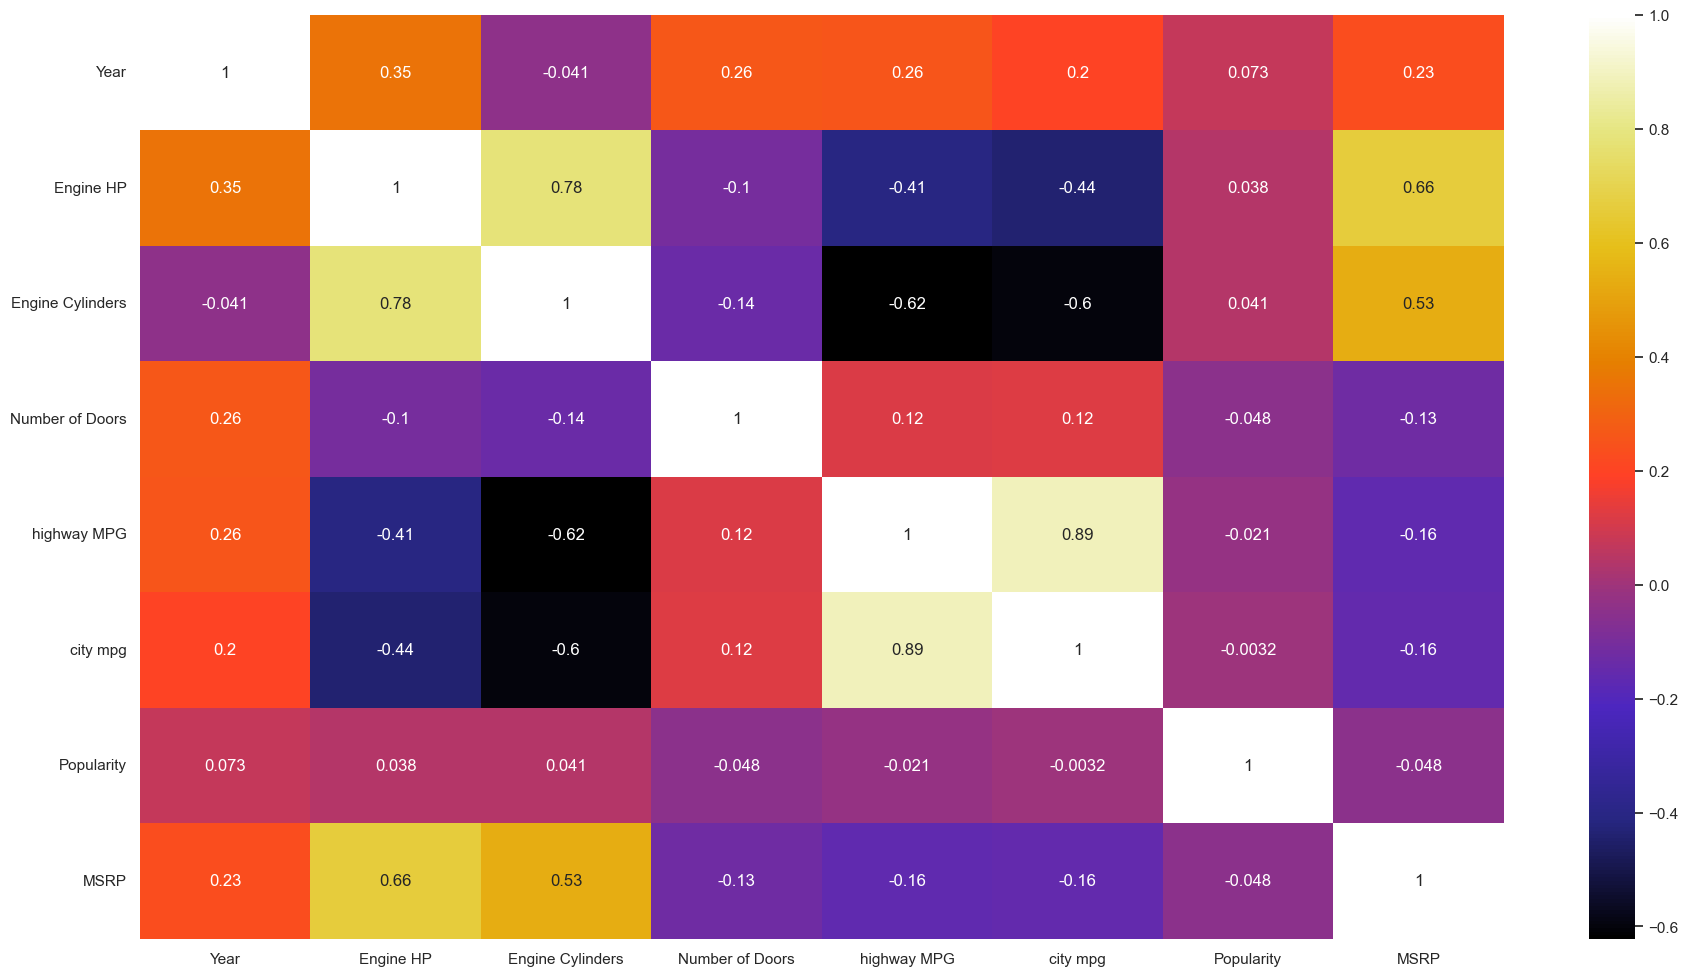

In [11]:
# Using Heat map Plotting Correlation plot

def plot_corr(data):
    corr = data.corr()
    sns.set_theme()
    plt.figure(figsize = (22,12))
    sns.heatmap(corr, cbar=True, annot=True, cmap='CMRmap')
plot_corr(data)

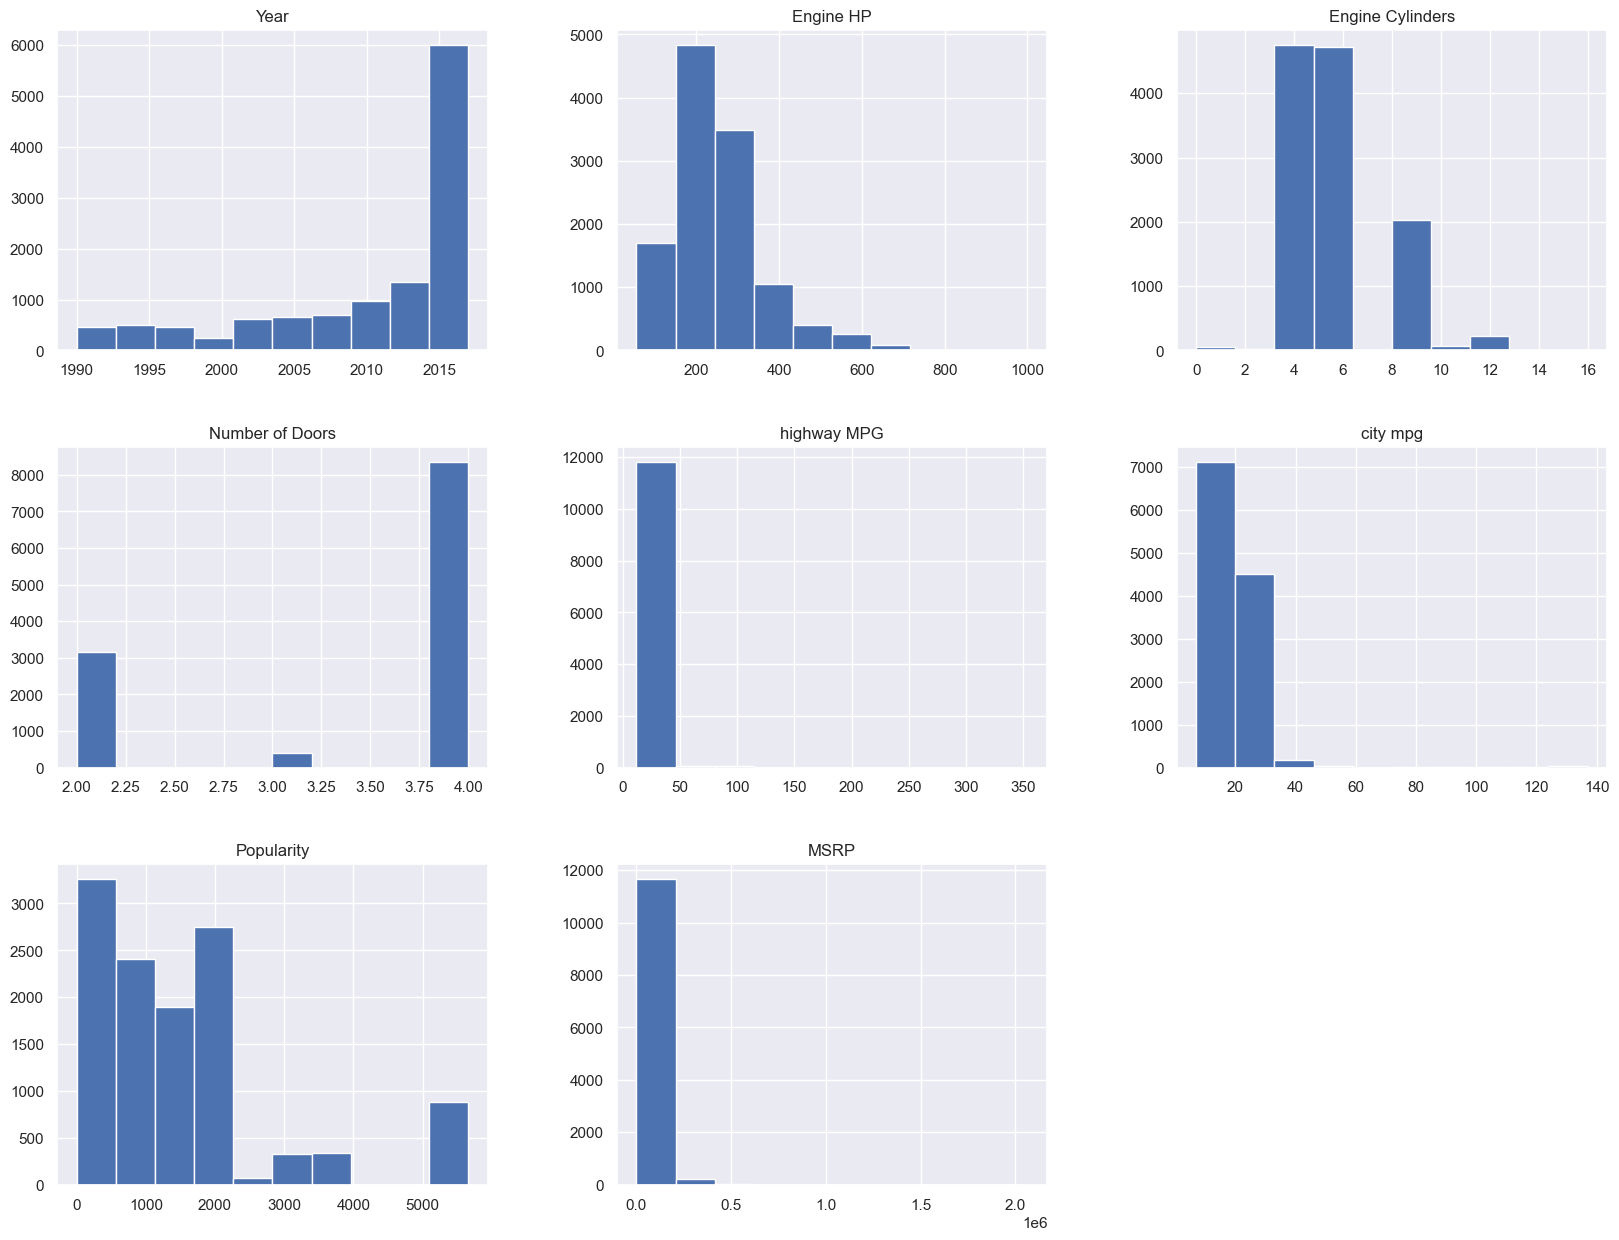

In [12]:
# Potting Numerical Values

freqgraph= data.select_dtypes(include=['float','int64'])
freqgraph.hist(figsize=(20,15))
plt.show()

# 

# Pre-processing

In [13]:
# Deleting duplicate values by keeping the first row
data.drop_duplicates(inplace=True, keep='first')

In [14]:
# Checking the dimension after dropping dupplicates
data.shape

(11199, 16)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11199 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11199 non-null  object 
 1   Model              11199 non-null  object 
 2   Year               11199 non-null  int64  
 3   Engine Fuel Type   11196 non-null  object 
 4   Engine HP          11130 non-null  float64
 5   Engine Cylinders   11169 non-null  float64
 6   Transmission Type  11199 non-null  object 
 7   Driven_Wheels      11199 non-null  object 
 8   Number of Doors    11193 non-null  float64
 9   Market Category    7823 non-null   object 
 10  Vehicle Size       11199 non-null  object 
 11  Vehicle Style      11199 non-null  object 
 12  highway MPG        11199 non-null  int64  
 13  city mpg           11199 non-null  int64  
 14  Popularity         11199 non-null  int64  
 15  MSRP               11199 non-null  int64  
dtypes: float64(3), int64(5

In [16]:
# Filling Missing Values using Mean and Median in numerical variables and using mode in categorical variable

data['Engine Fuel Type']=data['Engine Fuel Type'].fillna(data['Engine Fuel Type'].mode()[0])
data['Engine HP']=data['Engine HP'].fillna(data['Engine HP'].median())
data['Engine Cylinders']=data['Engine Cylinders'].fillna(data['Engine Cylinders'].median())
data['Market Category']=data['Market Category'].fillna(data['Market Category'].mode()[0])
data['Number of Doors']=data['Number of Doors'].fillna(data['Number of Doors'].median())

In [17]:
# Recheking the missing values

data.isna().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

## Removing Outliers

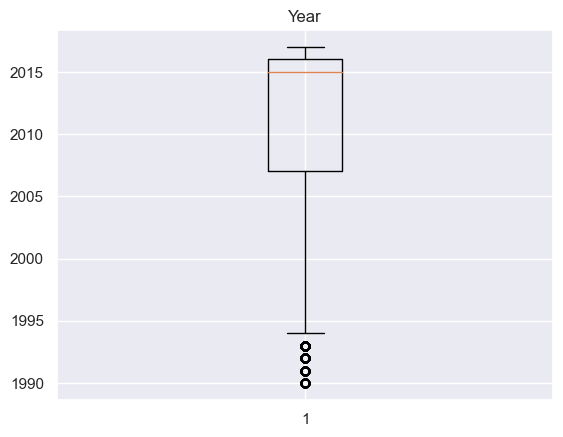

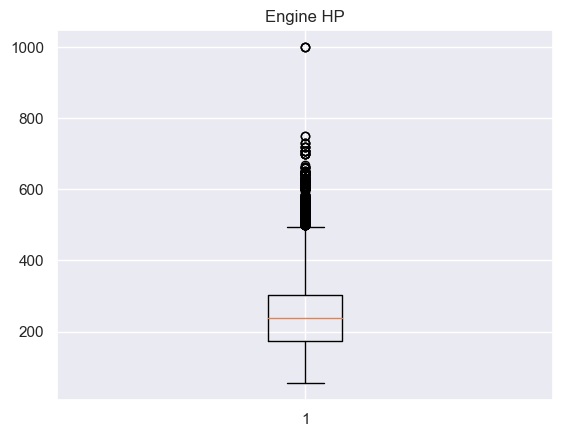

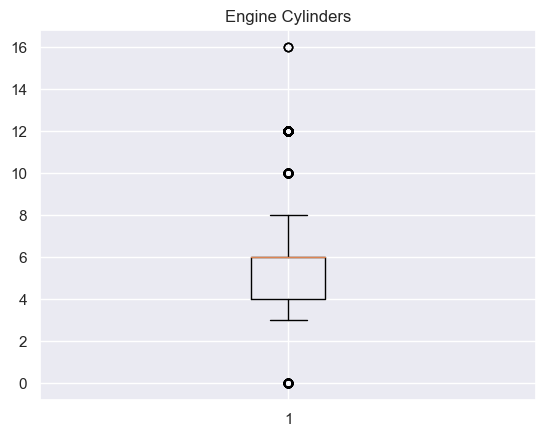

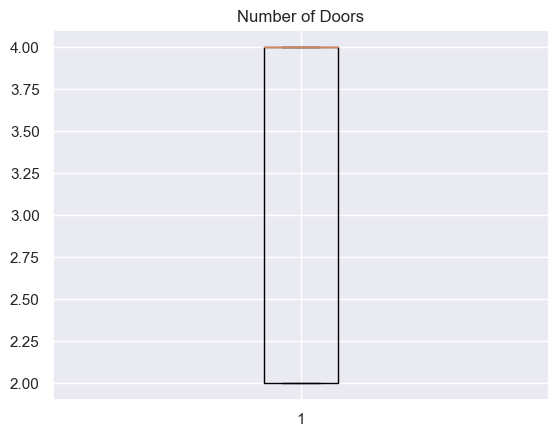

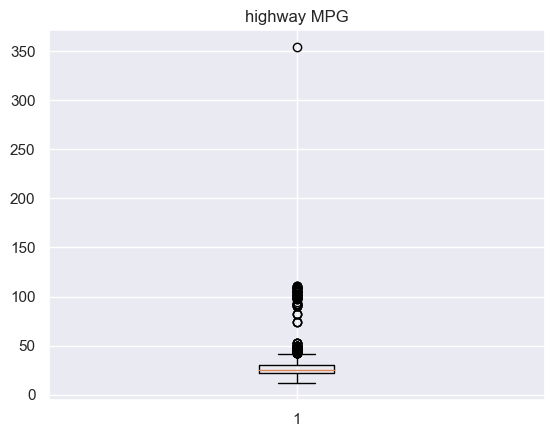

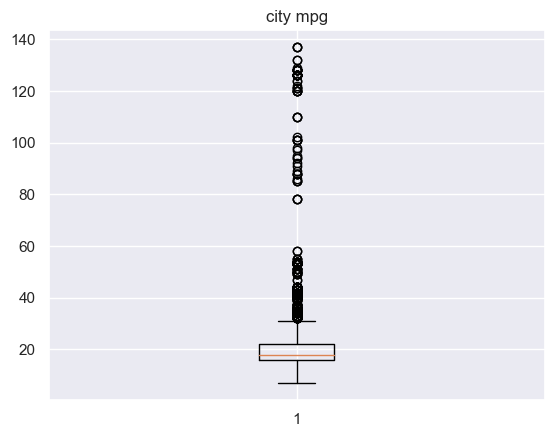

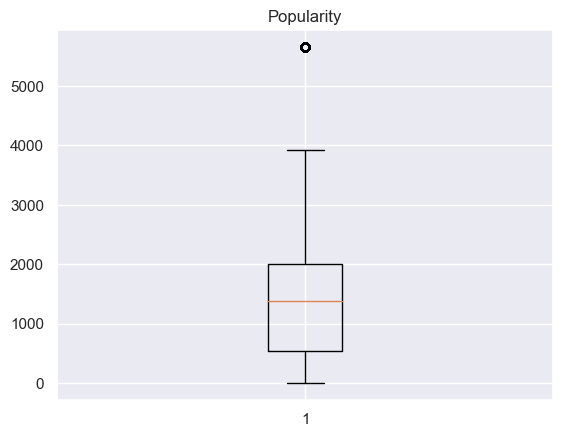

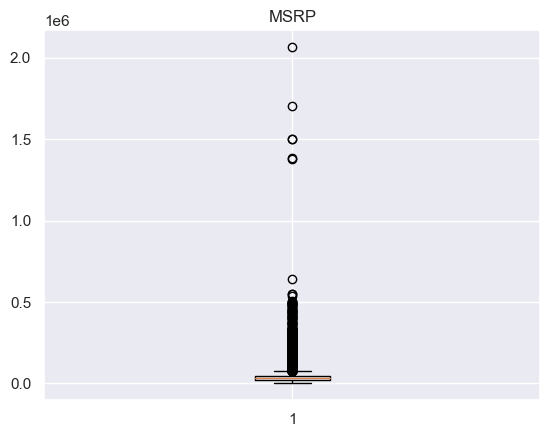

In [18]:
#Boxplot for numerical column
for i in freqgraph:
    plt.figure()
    plt.boxplot(data[i])
    plt.title(i)

In [19]:
#Treating outliers using IQR


#Treating outliers in Year

Q1 = data.Year.quantile(0.25)
Q3 = data.Year.quantile(0.75)
IQR = Q3 - Q1
min_limit = Q1 - (IQR * 1.5)
max_limit = Q3 + (IQR * 1.5)
print(min_limit, max_limit,IQR)
data.loc[data['Year']>max_limit,'Year']=np.median(data.Year)
data.loc[data.Year > max_limit]
data.loc[data['Year']<min_limit,'Year']=np.median(data.Year)

1993.5 2029.5 9.0


In [20]:
data.loc[data['Year']<min_limit]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP


In [ ]:
#Treating outliers in City mpg

Q1 = data.city mpg.quantile(0.25)
Q3 = data.city mpg.quantile(0.75)
IQR = Q3 - Q1
min_limit = Q1 - (IQR * 1.5)
max_limit = Q3 + (IQR * 1.5)
print(min_limit, max_limit,IQR)
data.loc[data['city mpg']>max_limit,'city mpg']=np.median(data.city mpg)
data.loc[data['city mpg']<min_limit,'city mpg']=np.median(data.city mpg)

#Treating outliers in Engine HP

Q1 = data.Engine HP.quantile(0.25)
Q3 = data.Engine HP.quantile(0.75)
IQR = Q3 - Q1
min_limit = Q1 - (IQR * 1.5)
max_limit = Q3 + (IQR * 1.5)
print(min_limit, max_limit,IQR)
data.loc[data['Engine HP']>max_limit,'Engine HP']=np.median(data.Engine HP)
data.loc[data['Engine HP']<min_limit,'Engine HP']=np.median(data.Engine HP)


#Treating outliers in Engine Cylinders

Q1 = data.Engine Cylinders.quantile(0.25)
Q3 = data.Engine Cylinders.quantile(0.75)
IQR = Q3 - Q1
min_limit = Q1 - (IQR * 1.5)
max_limit = Q3 + (IQR * 1.5)
print(min_limit, max_limit,IQR)
data.loc[data['Engine Cylinders']>max_limit,'Engine Cylinders']=np.median(data.Engine Cylinders)
data.loc[data['Engine Cylinders']<min_limit,'Engine Cylinders']=np.median(data.Engine Cylinders)


In [21]:
#Treating outliers in  Popularity

Q1 = data.Popularity.quantile(0.25)
Q3 = data.Popularity.quantile(0.75)
IQR = Q3 - Q1
min_limit = Q1 - (IQR * 1.5)
max_limit = Q3 + (IQR * 1.5)
data.loc[data['Popularity']>max_limit,'Popularity']=np.median(data.Popularity)
data.loc[data.Popularity > max_limit]
data.loc[data['Popularity']<min_limit,'Popularity']=np.median(data.Popularity)

In [22]:
data.loc[data['Popularity']>max_limit]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP


In [23]:
data.loc[data['Popularity']<min_limit]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11199 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11199 non-null  object 
 1   Model              11199 non-null  object 
 2   Year               11199 non-null  int64  
 3   Engine Fuel Type   11199 non-null  object 
 4   Engine HP          11199 non-null  float64
 5   Engine Cylinders   11199 non-null  float64
 6   Transmission Type  11199 non-null  object 
 7   Driven_Wheels      11199 non-null  object 
 8   Number of Doors    11199 non-null  float64
 9   Market Category    11199 non-null  object 
 10  Vehicle Size       11199 non-null  object 
 11  Vehicle Style      11199 non-null  object 
 12  highway MPG        11199 non-null  int64  
 13  city mpg           11199 non-null  int64  
 14  Popularity         11199 non-null  int64  
 15  MSRP               11199 non-null  int64  
dtypes: float64(3), int64(5

In [25]:
# Encoding the categorical variables using LabelEncoder

le=LabelEncoder()
data['Make']=le.fit_transform(data['Make'])
data['Model']=le.fit_transform(data['Model'])
data['Engine Fuel Type']=le.fit_transform(data['Engine Fuel Type'])
data['Transmission Type']=le.fit_transform(data['Transmission Type'])
data['Market Category']=le.fit_transform(data['Market Category'])
data['Driven_Wheels']=le.fit_transform(data['Driven_Wheels'])
data['Vehicle Size']=le.fit_transform(data['Vehicle Size'])
data['Vehicle Style']=le.fit_transform(data['Vehicle Style'])

In [26]:
data.dtypes

Make                   int32
Model                  int32
Year                   int64
Engine Fuel Type       int32
Engine HP            float64
Engine Cylinders     float64
Transmission Type      int32
Driven_Wheels          int32
Number of Doors      float64
Market Category        int32
Vehicle Size           int32
Vehicle Style          int32
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

# Modelling


In [27]:
#Splitting the data into independent and dependent variables
x=data.drop(['MSRP'],axis=1)
y=data['MSRP']

In [28]:
data.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [29]:
# Scaling of Dataset using StandardScaler

scaler = StandardScaler() 
numeric_features = []

for col in x.columns:
    if(x[col].dtype == "float","int64" ):
        numeric_features.append(col)

x[numeric_features] = scaler.fit_transform(x[numeric_features])
x

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity
0,-1.311957,-1.693869,-0.112030,0.018766,0.743998,0.185641,1.732666,1.149734,-1.666447,0.335633,-1.119142,-0.075859,-0.068015,-0.079747,3.074371
1,-1.311957,-1.697569,-0.112030,0.018766,0.425271,0.185641,1.732666,1.149734,-1.666447,1.398099,-1.119142,-0.486464,0.154770,-0.079747,3.074371
2,-1.311957,-1.697569,-0.112030,0.018766,0.425271,0.185641,1.732666,1.149734,-1.666447,1.288189,-1.119142,-0.075859,0.154770,0.029219,3.074371
3,-1.311957,-1.697569,-0.112030,0.018766,-0.212183,0.185641,1.732666,1.149734,-1.666447,1.398099,-1.119142,-0.075859,0.154770,-0.188713,3.074371
4,-1.311957,-1.697569,-0.112030,0.018766,-0.212183,0.185641,1.732666,1.149734,-1.666447,1.251552,-1.119142,-0.486464,0.154770,-0.188713,3.074371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,-1.590325,1.636278,0.052166,0.018766,0.425271,0.185641,-0.474982,-1.623644,0.625122,-0.580287,1.175278,-1.307675,-0.402194,-0.406646,-1.196254
11910,-1.590325,1.636278,0.052166,0.018766,0.425271,0.185641,-0.474982,-1.623644,0.625122,-0.580287,1.175278,-1.307675,-0.402194,-0.406646,-1.196254
11911,-1.590325,1.636278,0.052166,0.018766,0.425271,0.185641,-0.474982,-1.623644,0.625122,-0.580287,1.175278,-1.307675,-0.402194,-0.406646,-1.196254
11912,-1.590325,1.636278,0.216362,-0.528526,0.425271,0.185641,-0.474982,-1.623644,0.625122,-0.580287,1.175278,-1.307675,-0.402194,-0.406646,-1.196254


In [30]:
y

0        46135
1        40650
2        36350
3        29450
4        34500
         ...  
11909    46120
11910    56670
11911    50620
11912    50920
11913    28995
Name: MSRP, Length: 11199, dtype: int64

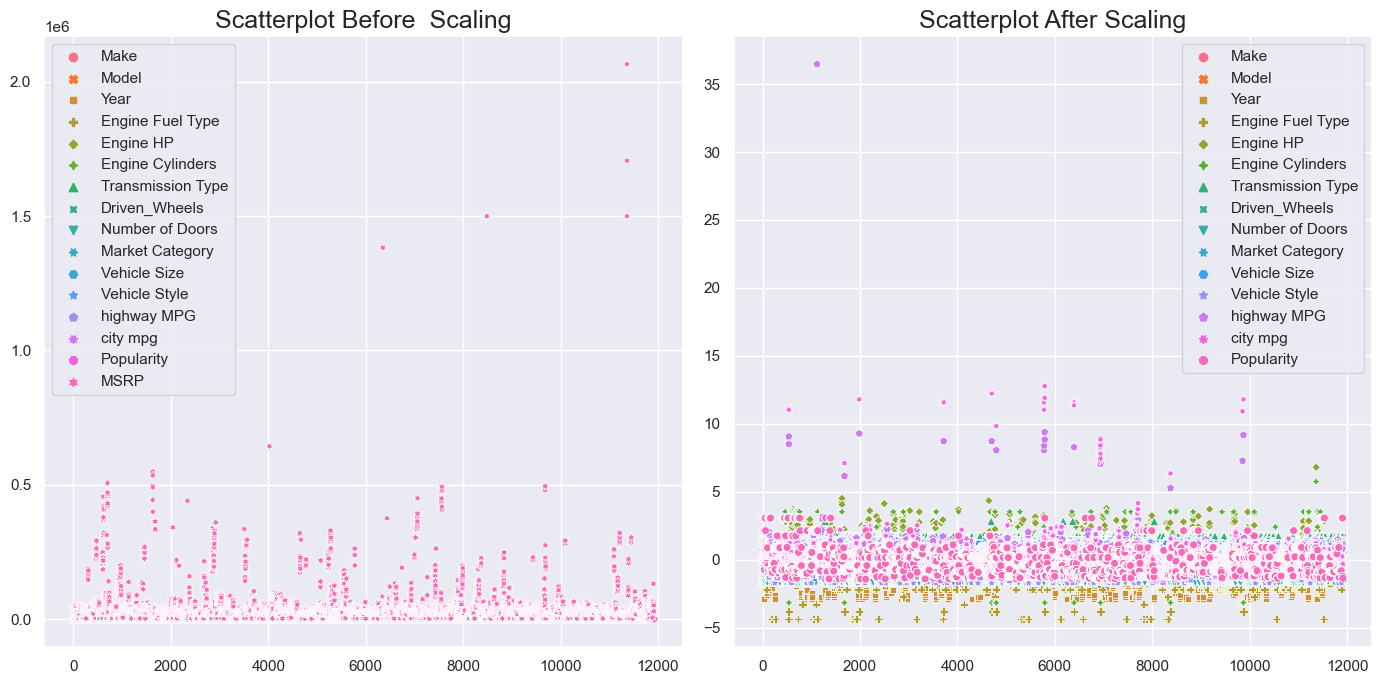

In [31]:
# plotting the scatterplot of before and after  Scaling
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.title("Scatterplot Before  Scaling", fontsize=18)
sns.scatterplot(data = data, color="blue")
plt.subplot(1,2,2)
plt.title("Scatterplot After Scaling", fontsize=18)
sns.scatterplot(data = x, color="red")
plt.tight_layout()
plt.show()

In [32]:
#splitting the data into train ,validation,test

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.05, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.21, random_state=42)

In [33]:
# shape of each train ,validation and test data

print(x_train.shape),print(y_train.shape)
print(x_val.shape),print(y_val.shape)
print(x_test.shape),print(y_test.shape)

(8404, 15)
(8404,)
(2235, 15)
(2235,)
(560, 15)
(560,)


(None, None)

REGRESSION MODELING

In [34]:
from sklearn.linear_model import Lasso,LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC

In [35]:
models = {
    'Linear Regression': LinearRegression(),
    'Lasso Regression ': Lasso(random_state=0),
    'Decision Tree Regression ': DecisionTreeRegressor(random_state=0, max_depth=5),
    'Random Forest': RandomForestRegressor(random_state=0, max_depth=5, n_estimators=10, max_features=1),
    'XGBRegressor': XGBRegressor(random_state=0)
}


In [36]:
for name,model in models.items():
    model.fit(x_train,y_train)
    print(name + ' trained')

Linear Regression trained
Lasso Regression  trained
Decision Tree Regression  trained
Random Forest trained
XGBRegressor trained


In [37]:
# importing mean squared error and r2 score for model evaluation 
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_absolute_error

In [38]:
def get_rmse(y_true,y_pred):
    rmse = np.sqrt(np.mean((y_true-y_pred)**2))
    return rmse

In [39]:
for name,model in models.items():
    y_pred = model.predict(x_train)
    rmse = get_rmse(y_train,y_pred)
    print(name + ' RMSE: {:.2f}'.format(rmse))

Linear Regression RMSE: 41248.08
Lasso Regression  RMSE: 41248.08
Decision Tree Regression  RMSE: 19421.30
Random Forest RMSE: 30753.77
XGBRegressor RMSE: 3287.97


In [40]:
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_train)
    mae = mean_absolute_error(y_train, y_pred)
    print(name + ' MAE: {:.2f}'.format(mae))  

Linear Regression MAE: 19790.54
Lasso Regression  MAE: 19789.66
Decision Tree Regression  MAE: 8486.58
Random Forest MAE: 14169.06
XGBRegressor MAE: 2239.30


## By looking at the RMSE and MAE value XGBREgressor is the best performing model in Training data set

# Fine tuning

In [41]:
# Tuning of XGBREgrssor model in validation set

xgbr = XGBRegressor()
xgbr.fit(x_train, y_train)
y_val_pred = xgbr.predict(x_val)
mae = mean_absolute_error(y_val,y_val_pred)
mse = mse(y_val,y_val_pred)
r2  = r2(y_val,y_val_pred)
print('MAE :',mae)
print('MSE :',mse)


MAE : 4643.122568083556
MSE : 605497321.2330714


In [46]:
# Prediction using Test data
y_test_pred = xgbr.predict(x_test)
mae = mean_absolute_error(y_test,y_test_pred)
print('MAE :',mae)



MAE : 3193.3919020516532


# CONCLUSION

In [ ]:
Therefore XGBREgrssor predictive model that can provide accurate and reliable price estimates for used
cars.